In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn import metrics


In [14]:
car_insurance_dataSet = pd.read_csv("car data.csv")
car_insurance_dataSet.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [15]:
car_insurance_dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [16]:
car_insurance_dataSet.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [17]:
car_insurance_dataSet.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


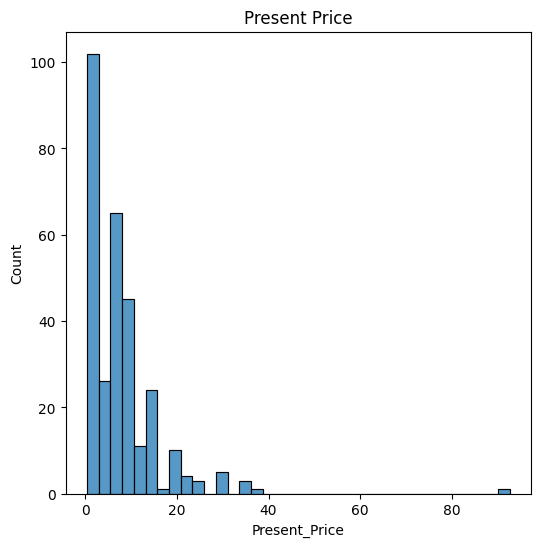

In [18]:
plt.figure(figsize =(6,6))
sns.histplot(car_insurance_dataSet['Present_Price'])
plt.title("Present Price")
plt.show()

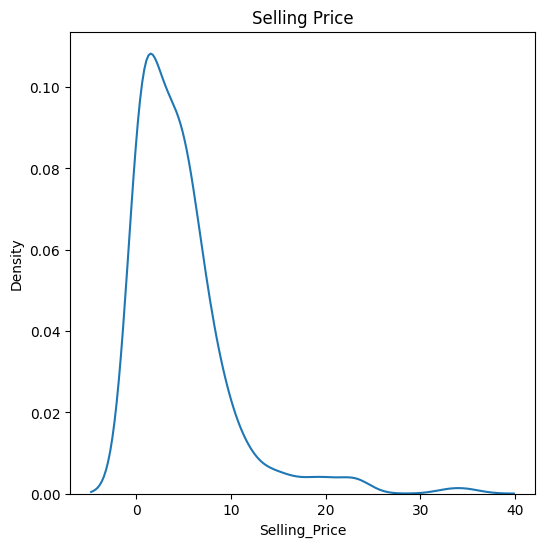

In [19]:
plt.figure(figsize =(6,6))
sns.kdeplot(car_insurance_dataSet['Selling_Price'])
plt.title("Selling Price")
plt.show()

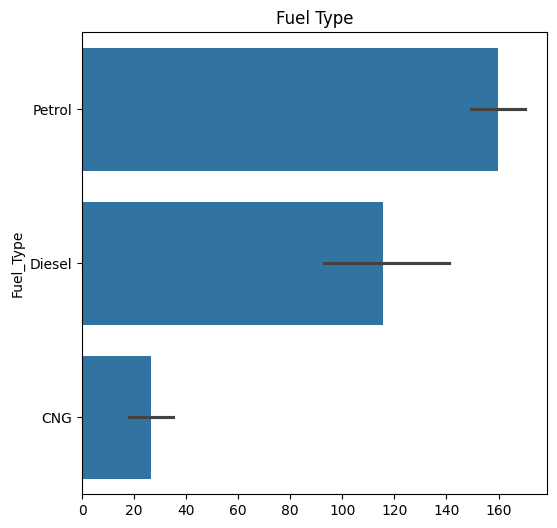

In [20]:
plt.figure(figsize =(6,6))
sns.barplot(car_insurance_dataSet['Fuel_Type'])
plt.title("Fuel Type")
plt.show()

In [21]:
car_insurance_dataSet.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [22]:
print(car_insurance_dataSet['Fuel_Type'].value_counts())
print(car_insurance_dataSet['Seller_Type'].value_counts())
print(car_insurance_dataSet['Transmission'].value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [23]:

car_insurance_dataSet.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace = True)
car_insurance_dataSet.replace({'Transmission':{'Manual':0,'Automatic': 1}},inplace = True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_19368\1747415857.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_insurance_dataSet.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace = True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_19368\1747415857.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_insurance_dataSet.replace({'Transmission':{'Manual':0,'Automatic': 1}},inplace = True)


In [24]:
car_insurance_dataSet.replace({"Fuel_Type":{'Petrol':0,'Diesel':1,'CNG':2}},inplace = True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_19368\3549348844.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_insurance_dataSet.replace({"Fuel_Type":{'Petrol':0,'Diesel':1,'CNG':2}},inplace = True)


In [25]:
car_insurance_dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    int64  
 6   Seller_Type    301 non-null    int64  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 21.3+ KB


In [26]:
car_insurance_dataSet.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [27]:
X = car_insurance_dataSet.drop(['Car_Name','Selling_Price'],axis =1)
Y = car_insurance_dataSet['Selling_Price']

In [28]:
print(X)
print(Y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [29]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=42)

In [30]:
from sklearn.metrics import mean_squared_error
def display_results(model):
    coefs = [model.intercept_]
    coefs += list(model.coef_)
    
    ytrain_predict=model.predict(X_train)
    ytest_predict=model.predict(X_test)

    train_error=np.sqrt(mean_squared_error(Y_train,ytrain_predict)) # we need the actuall minus the prediction 
    test_error=np.sqrt(mean_squared_error(Y_test,ytest_predict))
    
    print("Training error (rmse):", train_error)
    print("Testing error (rmse):", test_error)

    plt.scatter(Y_train, ytrain_predict, marker='o', label = 'Train Predictions')
    plt.scatter(Y_test, ytest_predict, marker='^', label = 'Test Prediction')

    plt.plot([min(Y_train),max(Y_train)],[min(Y_train),max(Y_train)],color = 'black',linewidth = 2, label = 'Ideal ')
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.title("True vs Predicted Values")
    plt.legend()
    plt.show()
    print('coefficients: ')
    print(coefs)

In [31]:
lin_reg_model = LinearRegression()

In [32]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Training error (rmse): 1.7918704437854567
Testing error (rmse): 1.5871125695256345


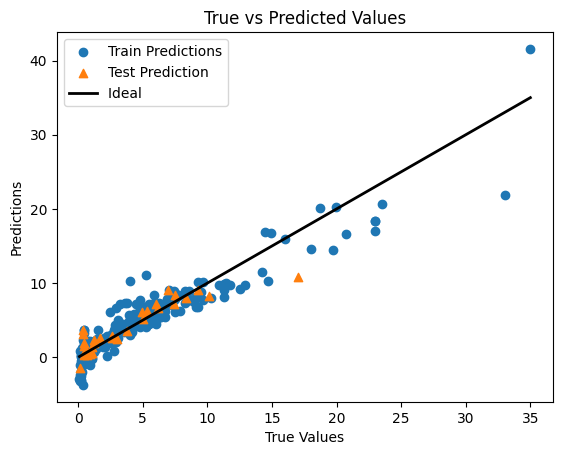

coefficients: 
[-812.823697861524, 0.40436297231470186, 0.4375297407926063, -6.386702569527447e-06, 1.6071794129498609, -1.0284018386276461, 1.6803828848060378, -0.8037199791269934]


In [33]:
display_results(lin_reg_model)

In [34]:
Lazzo_model = Lasso()

In [35]:
Lazzo_model.fit(X_train,Y_train)

Lasso()

Training error (rmse): 2.0503504697663506
Testing error (rmse): 1.5484932445075412


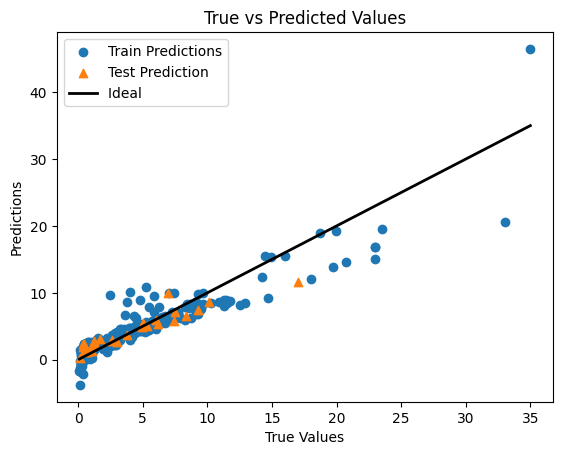

coefficients: 
[-671.1815606257097, 0.3338327254830167, 0.5091390737306508, -6.389208031128585e-06, 0.0, -0.0, 0.0, -0.0]


In [36]:
display_results(Lazzo_model)

In [37]:
ridge_model = Ridge()

In [38]:
ridge_model.fit(X_train,Y_train)

Ridge()

Training error (rmse): 1.792107492358516
Testing error (rmse): 1.5740341832799598


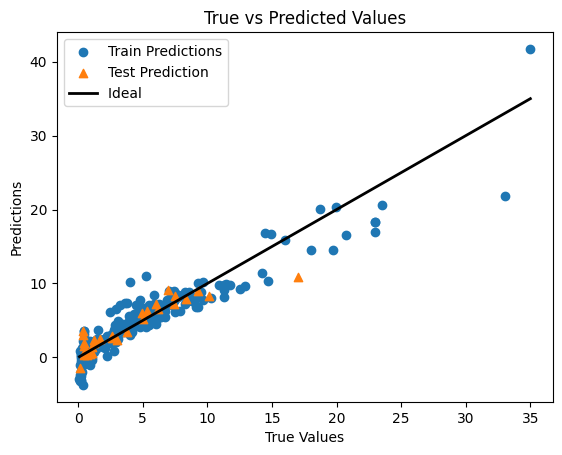

coefficients: 
[-817.6981146541548, 0.4067764583413969, 0.4398306335011833, -6.220263308227576e-06, 1.5649522029316767, -1.007877428956576, 1.610465508371943, -0.7616948483111996]


In [39]:
display_results(ridge_model)